In [1]:
# ISYS2407 Information Systems Solutions & Design

# Assignment 3

# Exploratory Data Analysis

#### Student name:

#### Student number:

In [2]:
# Library for pickling
import joblib

# Library for splitting the data into train and test sets
from sklearn.model_selection import train_test_split 

# Other libraries will be imported later as and when they are needed
# Library for pickling
import joblib

# Library for splitting the data into train and test sets
from sklearn.model_selection import train_test_split 

# Model library
from sklearn.linear_model import LogisticRegression
# Model libraries
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

# Library for performing grid search
from sklearn.model_selection import GridSearchCV

# Library needed for counting categorical values
import collections

# Scaling
from sklearn.preprocessing import StandardScaler

# label encoder
from sklearn.preprocessing import LabelEncoder

# Onehot encoding
from sklearn.preprocessing import LabelBinarizer
import pandas as pd
import numpy as np

# Metrics library
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

# Plotting libraries
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

In [3]:
# Load the pickled file
personalLoan_df = joblib.load('personalLoan-cleaned.pkl')  

# Check
personalLoan_df.head()

,customer_id,age,yrs_experience,family_size,education_level,income,mortgage_amt,credit_card_acct,credit_card_spend,share_trading_acct,fixed_deposit_acct,online_acct,personal_loan
0,3,43.0,33.0,1.0,0,54.0,0,0,0.0,0,0,1,0
1,8,60.0,12.0,3.0,1,121.0,125,1,2.1,1,0,1,1
2,10,63.0,13.0,4.0,1,30.0,98,0,0.0,0,1,1,0
3,11,35.0,12.0,1.0,0,121.0,0,0,0.0,0,0,0,0
4,12,37.0,29.0,3.0,1,47.0,0,1,0.9,1,0,1,0


# Split data set

In [4]:
# Store the features in variable X (uppercase as there are multiple features)

# Features are variables that affect the target/label
# So, it's all the columns excluding the target column
# However, you may also use a subset of features previously identified as best features
# You might want to experiment with both the full set and the best features
feature_cols = [
    'age', 
    'yrs_experience', 
    'family_size', 
    'education_level',
    'income', 
    'mortgage_amt', 
    'credit_card_acct', 
    'credit_card_spend',
    'share_trading_acct',
    'fixed_deposit_acct',
    'online_acct',
]

X = personalLoan_df[feature_cols]
#print('X:\n', X)

# Store the labels/target in variable y (lower case as its a single value)
y = personalLoan_df['personal_loan']
#print('y:\n', y)

# Split into train/test set
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, # keep 20% for testing
                                                    random_state=2 # pass an int for reproducible rtesult
                                                    )

In [5]:
# Check
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(3028, 11) (3028,)
(758, 11) (758,)


# Transform

In [6]:
#  Scaling of continuous variables

In [7]:
# 1. Select the columns to scale
# Make sure they are continuous columns as scaling is only for continuous values
# Better list all the columns and comment out the ones you don't need
columns_to_scale = [
    'age', 
    'yrs_experience', 
    'family_size', 
    'education_level',
    'mortgage_amt', 
    'credit_card_acct', 
    'credit_card_spend',
    'share_trading_acct',
    'fixed_deposit_acct',
    'online_acct',

]

# 2. Make copy of the training and testing sets fix the issue below
# Warning: A value is trying to be set on a copy of a slice from a DataFrame.
# Try using .loc[row_indexer,col_indexer] = value instead
X_train = X_train.copy()
X_test = X_test.copy()

# 3. Instantiate a scaler
scaler = StandardScaler()
    
# 4. Fit the scaler on the training column and transform the training and testing columns
# Use a loop to scale all the required columns    
for col in columns_to_scale:
    #print(col)
    # First fit the scaler to the column in the training data
    # Must reshape the numpy array returned b the scaler from 1D to 2D
    scaler.fit(X_train[col].values.reshape(-1, 1))
    # Then transform both the training and testing sets
    X_train[col] = scaler.transform(X_train[col].values.reshape(-1, 1))
    X_test[col] = scaler.transform(X_test[col].values.reshape(-1, 1))

# Check
print(X_train.shape, X_test.shape)

(3028, 11) (758, 11)


In [8]:
# Check again
X_train.head()

,age,yrs_experience,family_size,education_level,income,mortgage_amt,credit_card_acct,credit_card_spend,share_trading_acct,fixed_deposit_acct,online_acct
2198,0.068405,0.788952,-1.250803,-1.333627,74.0,0.799192,1.510168,-0.309223,-0.326688,-0.301946,0.815261
3244,0.068405,1.629212,-0.357541,1.065079,105.0,0.336142,-0.662178,-0.450737,-0.326688,-0.301946,0.815261
1741,-1.245665,0.788952,-1.250803,1.065079,54.0,-0.781953,-0.662178,-0.450737,-0.326688,-0.301946,0.815261
2989,-1.327795,-0.555466,-1.250803,1.065079,52.0,-0.781953,-0.662178,-0.450737,3.061023,-0.301946,0.815261
1041,0.971828,-1.059622,-1.250803,-1.333627,39.0,-0.781953,-0.662178,-0.450737,3.061023,-0.301946,0.815261


In [9]:
# Check again
X_test.head()

,age,yrs_experience,family_size,education_level,income,mortgage_amt,credit_card_acct,credit_card_spend,share_trading_acct,fixed_deposit_acct,online_acct
2855,1.628863,0.872978,1.428983,-0.134274,82.0,0.912131,-0.662178,-0.450737,-0.326688,-0.301946,0.815261
477,-0.342242,-0.051309,0.535721,-1.333627,39.0,-0.781953,-0.662178,-0.450737,3.061023,-0.301946,0.815261
1786,-1.409924,0.368821,-1.250803,-1.333627,77.0,0.855661,-0.662178,-0.450737,-0.326688,-0.301946,-1.226601
3504,0.889699,-1.731831,1.428983,-0.134274,155.0,-0.781953,-0.662178,-0.450737,3.061023,3.311854,0.815261
1367,-1.574183,-1.143648,-1.250803,-1.333627,83.0,1.996344,-0.662178,-0.450737,-0.326688,-0.301946,-1.226601


In [10]:
# Discretization of continuous values


In [11]:
# When checking the number of unique values, the blood pressure column was found to contain 47 values
# This is evidence that it's a continuous variable

# Some classification algorithms do not work well with continuous values - too many values
# So, depending on the classification algorithm you are usind, you might need to categorise these values
# How? Need some domain knowlege
# For blood pressure we could use the following:
# less than 80 = normal, between 80-89 = high, greater than 89 = very high

# Define a function to classify this
# Pass the whole dataframe as parameter
# And return a category (a word label but you could also return numeric labels)
# NOTE: Do not create too many categories as this will affect the learning algorithms
def income_category(df): 
    if df["income"] <= 50:
        return "low_income"
    elif (df["income"] > 50) & (df["income"] <= 89):
        return "medium_income"
    elif df["income"] > 89:
        return "high_income"

In [12]:
# Apply the  previously defined function to the training set

# Use apply() to apply a lambda function for all the rows of the dataframe
# The lambda function calls the previously defined function bp_category()
# To which it passes the diabetes_df as parameter
# And a category is returned and saved in a new column named "blood_pressure_category"
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.apply.html
# the backslash is a line continuation character - there should be nothing after it, not even a space

# Warning: A value is trying to be set on a copy of a slice from a DataFrame.
# Try using .loc[row_indexer,col_indexer] = value instead
# Below is another fix - make a copy
X_train = X_train.copy()
X_train["income_category"] = \
    X_train.apply(lambda X_train:income_category(X_train), axis = 1) # axis=1 = row-wise

# The column "blood_pressure" is no longer needed and hence can be deleted 
X_train.drop(['income'], axis=1, inplace=True)

# Check
X_train.head()

,age,yrs_experience,family_size,education_level,mortgage_amt,credit_card_acct,credit_card_spend,share_trading_acct,fixed_deposit_acct,online_acct,income_category
2198,0.068405,0.788952,-1.250803,-1.333627,0.799192,1.510168,-0.309223,-0.326688,-0.301946,0.815261,medium_income
3244,0.068405,1.629212,-0.357541,1.065079,0.336142,-0.662178,-0.450737,-0.326688,-0.301946,0.815261,high_income
1741,-1.245665,0.788952,-1.250803,1.065079,-0.781953,-0.662178,-0.450737,-0.326688,-0.301946,0.815261,medium_income
2989,-1.327795,-0.555466,-1.250803,1.065079,-0.781953,-0.662178,-0.450737,3.061023,-0.301946,0.815261,medium_income
1041,0.971828,-1.059622,-1.250803,-1.333627,-0.781953,-0.662178,-0.450737,3.061023,-0.301946,0.815261,low_income


In [13]:
# Apply the  previously defined function to the testing set
X_test = X_test.copy()
X_test["income_category"] = \
    X_test.apply(lambda X_test:income_category(X_test), axis = 1) # axis=1 = row-wise

# The column "blood_pressure" is no longer needed and hence can be deleted 
X_test.drop(['income'], axis=1, inplace=True)

# Check
X_test.head()

,age,yrs_experience,family_size,education_level,mortgage_amt,credit_card_acct,credit_card_spend,share_trading_acct,fixed_deposit_acct,online_acct,income_category
2855,1.628863,0.872978,1.428983,-0.134274,0.912131,-0.662178,-0.450737,-0.326688,-0.301946,0.815261,medium_income
477,-0.342242,-0.051309,0.535721,-1.333627,-0.781953,-0.662178,-0.450737,3.061023,-0.301946,0.815261,low_income
1786,-1.409924,0.368821,-1.250803,-1.333627,0.855661,-0.662178,-0.450737,-0.326688,-0.301946,-1.226601,medium_income
3504,0.889699,-1.731831,1.428983,-0.134274,-0.781953,-0.662178,-0.450737,3.061023,3.311854,0.815261,high_income
1367,-1.574183,-1.143648,-1.250803,-1.333627,1.996344,-0.662178,-0.450737,-0.326688,-0.301946,-1.226601,medium_income


In [14]:
# Label encoding of categorical variables
# OneHot encoding


In [15]:
# 1. Select the columns to one-hot encode
# Make sure the columns are categorical columns with multiple labels
# It does not matter whether the labels are words or numbers
# Better list all the columns and comment out the ones you don't need
columns_to_onehot_encode = [
    'income_category'
]

# 2 Instantiate a one-hot encoder
# enc = OneHotEncoder() # No, this will generate strings, not numbers
enc = LabelBinarizer()

# 3. Fit the encoder on the training column and transform the training and testing columns
# Use a loop to label encode all the required columns
for col in columns_to_onehot_encode:
    # Option 1. Using pandas (simpler than sklearn)
    ## Fix X_train
    dummies_df = pd.get_dummies(
        X_train[col], prefix="inc"
    )  # generate dataframe of dummies
    X_train.drop([col], axis=1, inplace=True)  # drop original column
    X_train = pd.concat([X_train, dummies_df], axis=1)  # concatenate both dataframes
    ## Fix X_test
    dummies_df = pd.get_dummies(X_test[col], prefix="inc")
    X_test.drop([col], axis=1, inplace=True)
    X_test = pd.concat([X_test, dummies_df], axis=1)

    # Option 2: Using sklearn
    # First fit the encoder to the training data
    # enc.fit(X_train[col].values.reshape(-1, 1)) # need to reshape
    # X_train_array = enc.transform(X_train[col])
    # X_test_array = enc.transform(X_test[col])
    # print(X_train_array)
    # print(X_train_array)
    # numpy arrays generated - have no column names and don't know the order the codes were generated
    # need to write complex code to generate column names for variable number of columns
    # to be able to convert the numpy array to a daframe
    # Better use the pandas solution!

# Check
X_train.head()



,age,yrs_experience,family_size,education_level,mortgage_amt,credit_card_acct,credit_card_spend,share_trading_acct,fixed_deposit_acct,online_acct,inc_high_income,inc_low_income,inc_medium_income
2198,0.068405,0.788952,-1.250803,-1.333627,0.799192,1.510168,-0.309223,-0.326688,-0.301946,0.815261,False,False,True
3244,0.068405,1.629212,-0.357541,1.065079,0.336142,-0.662178,-0.450737,-0.326688,-0.301946,0.815261,True,False,False
1741,-1.245665,0.788952,-1.250803,1.065079,-0.781953,-0.662178,-0.450737,-0.326688,-0.301946,0.815261,False,False,True
2989,-1.327795,-0.555466,-1.250803,1.065079,-0.781953,-0.662178,-0.450737,3.061023,-0.301946,0.815261,False,False,True
1041,0.971828,-1.059622,-1.250803,-1.333627,-0.781953,-0.662178,-0.450737,3.061023,-0.301946,0.815261,False,True,False


In [16]:
# Check
X_test.head()

,age,yrs_experience,family_size,education_level,mortgage_amt,credit_card_acct,credit_card_spend,share_trading_acct,fixed_deposit_acct,online_acct,inc_high_income,inc_low_income,inc_medium_income
2855,1.628863,0.872978,1.428983,-0.134274,0.912131,-0.662178,-0.450737,-0.326688,-0.301946,0.815261,False,False,True
477,-0.342242,-0.051309,0.535721,-1.333627,-0.781953,-0.662178,-0.450737,3.061023,-0.301946,0.815261,False,True,False
1786,-1.409924,0.368821,-1.250803,-1.333627,0.855661,-0.662178,-0.450737,-0.326688,-0.301946,-1.226601,False,False,True
3504,0.889699,-1.731831,1.428983,-0.134274,-0.781953,-0.662178,-0.450737,3.061023,3.311854,0.815261,True,False,False
1367,-1.574183,-1.143648,-1.250803,-1.333627,1.996344,-0.662178,-0.450737,-0.326688,-0.301946,-1.226601,False,False,True


In [17]:
# Fit Initial Model

In [18]:
# Import the model library
from sklearn.svm import SVC

# Instantiate model and fit on training data
svm_model = SVC(kernel='linear', 
            class_weight='balanced', # penalize
            probability=True).fit(X_train, y_train)

# Predict using test data
y_pred = svm_model.predict(X_test)

# Quick check
print(y_pred[:5])

[0 0 0 1 0]


In [19]:
# Compute performance metrics of the baseline model
classification_accuracy = accuracy_score(y_test, y_pred)
print(f"classification_accuracy: {classification_accuracy}")
print(f"Is this a good classifier?")

classification_accuracy: 0.8218997361477572
Is this a good classifier?


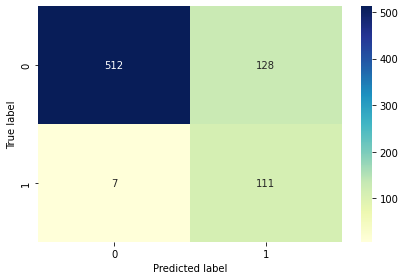

In [20]:
cf_matrix = confusion_matrix(y_test, y_pred)
# Visualise the confusion matrix as a Seaborn Heatmap
sns.heatmap(cf_matrix, annot=True, fmt="d", yticklabels=True, cmap="YlGnBu")

plt.ylabel("True label")
plt.xlabel("Predicted label")

# If you want to save the graph to disk
plt.tight_layout()  # automatically adjusts subplot to fit in the figure area
plt.savefig("confusion-matrix-initial.png", dpi=300)  # dpi=300 is print quality

In [21]:
recall = recall_score(y_test, y_pred)
print(f"recall: {recall}")

recall: 0.940677966101695


In [22]:
precision = precision_score(y_test, y_pred)
print(f"precision: {precision}")

precision: 0.46443514644351463


In [23]:
f1 = f1_score(y_test, y_pred)
print(f"F1 score: {f1}")

F1 score: 0.6218487394957983


In [24]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.80      0.88       640
           1       0.46      0.94      0.62       118

    accuracy                           0.82       758
   macro avg       0.73      0.87      0.75       758
weighted avg       0.91      0.82      0.84       758



In [25]:
# Either
# Method 1 - Extract tn, fp, fun and tp manually from the confusion matrix
#cf_matrix = confusion_matrix(y_test, y_pred)
# NOTE: the positions of tn, fp. fn, tp in the matrix is not standard! Check carefully
#tp = cf_matrix[1, 1] # row=1, col=1 - second row, second column
#tn = cf_matrix[0, 0] # row=0, col=0 - first row, first column
#fp = cf_matrix[0, 1] # row=0, col=1 - first row, second column
#fn = cf_matrix[1, 0] # row=1, col=0 - second row, first column
# Or
# Method2. Use numpy's ravel() function to flatten the 2D confusion matrix to a 1D array
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

# Print
print(f"tn {tn}")
print(f"fp {fp}" )
print(f"fn {fn}")
print(f"tp {tp}")

# Precision
precision = tp / (tp + fp)
print(f"precision: {precision}")

# Recall
recall = tp / (tp + fn)
print(f"recall: {recall}")

# F1
f1 = 2 * (precision * recall) / (precision + recall)
print(f"F1 score: {f1}")

tn 512
fp 128
fn 7
tp 111
precision: 0.46443514644351463
recall: 0.940677966101695
F1 score: 0.6218487394957983


In [26]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.80      0.88       640
           1       0.46      0.94      0.62       118

    accuracy                           0.82       758
   macro avg       0.73      0.87      0.75       758
weighted avg       0.91      0.82      0.84       758



AUC: 0.87


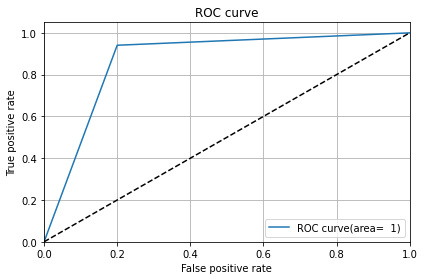

In [27]:
# Call function roc_curve() to get the false positive rates (fpr) and true positive rates
# Need to pass the list of actual and predicted classes as parameters to the function
fpr, tpr, thresholds = roc_curve(y_test,y_pred)
#print(fpr)
#print(tpr)

# Call the auc() function to calculate the area under the curve
# Need to pass the false positive rates (fpr) and true positive rates as parameters to the function
roc_auc = auc(fpr,tpr)
print(f'AUC: {roc_auc:0.2f}') # float 2 places of decimal

# Plot ROC curve
plt.figure()
plt.plot(fpr,tpr,label='ROC curve(area= %2.f)' %roc_auc)
plt.plot([0,1],[0,1],'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='lower right')
plt.grid()
#plt.show()

# If you want to save the graph to disk
plt.tight_layout() # automatically adjusts subplot to fit in the figure area
plt.savefig('roc-curve-initial.png', dpi=300) # dpi=300 is print quality

In [28]:
# Fine Tune

In [29]:
# Set up the grid for the parameter search
# Very slow for this grid!

# Ref: https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

# List of relevant params
#     C: float, default=1.0
#     kernel{‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}, default=’rbf’
#     gamma{‘scale’, ‘auto’} or float, default=’scale’
#     class_weight: dict or ‘balanced’, default=None

# class_weight='balanced' for imbalanced data sets
param_grid = [
    {"C": [1, 10, 100, 1000], "kernel": ["linear", "poly", "rbf", "sigmoid"]},
    {"C": [1, 10, 100, 1000], "gamma": [0.001, 0.0001], "kernel": ["rbf"]},
]

# Instantiate a grid search object and fit it to the training data
clf = SVC()
grid = GridSearchCV(clf, param_grid, verbose=0, cv=5)
grid.fit(X_train, y_train)
print(f"Best params: {grid.best_params_}, score: {grid.best_score_:0.2f}")

Best params: {'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}, score: 0.92


In [30]:
# Fit improved model with the best params

In [31]:
# Instantiate model and fit on training data
# Instantiate model and fit on training data
svm_model = SVC(kernel='linear', 
            class_weight='balanced', # penalize
            probability=True).fit(X_train, y_train)

# Predict using test data
y_pred = svm_model.predict(X_test)

# Quick check
print(y_pred[:5])

[0 0 0 1 0]


In [32]:
# Performance metric for improved model

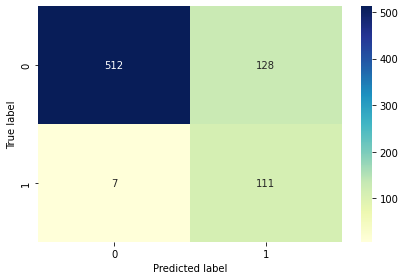

In [32]:
cf_matrix = confusion_matrix(y_test, y_pred)
# Visualise the confusion matrix as a Seaborn Heatmap
sns.heatmap(cf_matrix, annot=True, fmt="d", yticklabels=True, cmap="YlGnBu")

plt.ylabel("True label")
plt.xlabel("Predicted label")

# If you want to save the graph to disk
plt.tight_layout()  # automatically adjusts subplot to fit in the figure area
plt.savefig("confusion-matrix-initial.png", dpi=300)  # dpi=300 is print quality

In [33]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.80      0.88       640
           1       0.46      0.94      0.62       118

    accuracy                           0.82       758
   macro avg       0.73      0.87      0.75       758
weighted avg       0.91      0.82      0.84       758



AUC: 0.87


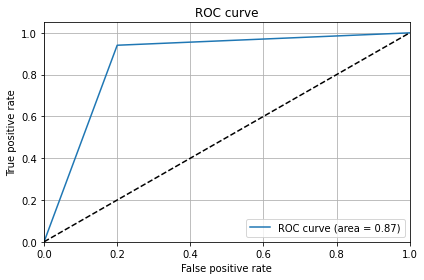

In [34]:
# Call function roc_curve() to get the false positive rates (fpr) and true positive rates
# Need to pass the list of actual and predicted classes as parameters to the function
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
# print(fpr)
# print(tpr)

# Call the auc() function to calculate the area under the curve
# Need to pass the false positive rates (fpr) and true positive rates as parameters to the function
roc_auc = auc(fpr, tpr)
print(f"AUC: {roc_auc:0.2f}")  # float 2 places of decimal

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, label="ROC curve (area = %.2f)" % roc_auc)
plt.plot([0, 1], [0, 1], "k--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.title("ROC curve")
plt.legend(loc="lower right")
plt.grid()
# plt.show()

# If you want to save the graph to disk
plt.tight_layout()  # automatically adjusts subplot to fit in the figure area
plt.savefig("roc-curve-initial.png", dpi=300)  # dpi=300 is print quality